In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
# path of data 
path = '/resources/magdy_clean_data.csv'
df = pd.read_csv(path)
df.head()

,Unnamed: 0,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,horsepower-binned,diesel,gas,std,turbo
0,0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,...,21,27,13495.0,11.190476,8.703704,Medium,0,1,1,0
1,1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,...,21,27,16500.0,11.190476,8.703704,Medium,0,1,1,0
2,2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,...,19,26,16500.0,12.368421,9.038462,Medium,0,1,1,0
3,3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,...,24,30,13950.0,9.791667,7.833333,Medium,0,1,1,0
4,4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,...,18,22,17450.0,13.055556,10.681818,Medium,0,1,1,0


In [3]:
#Linear Reression
from sklearn.linear_model import LinearRegression # Load modules for linear regression
lm=LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [4]:
#Use highway-mpg and price to predict car price, using linear regression
X=df[['highway-mpg']]
Y=df['price']

#Fit linear model using highway-mpg
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [5]:
# Do prediction
Yhat=lm.predict(X)
Yhat[0:5]

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

In [6]:
print(lm.intercept_) #value of intercept
print(lm.coef_) #Value of Slope

38423.3058581574
[-821.73337832]


In [7]:
#Doing the same prediction for price base on engine-size
lm1=LinearRegression()
x1=df[['engine-size']]
y1=df['price']

lm1.fit(x1,y1)

print(lm1.intercept_)
print(lm1.coef_)


-7963.338906281042
[166.86001569]


Multiple Linear Regression

From the previous section we know that other good predictors of price could be:

    Horsepower
    Curb-weight
    Engine-size
    Highway-mpg
    
SO will use them in multiple linear regression to develop model to predict car price


In [8]:
z=df[['horsepower','curb-weight','engine-size','highway-mpg']]

lm.fit(z,df['price'])

print(lm.intercept_)
print(lm.coef_)


-15806.62462632922
[53.49574423  4.70770099 81.53026382 36.05748882]


In [9]:
#Doing the same but for normalised-losses and highway-mpg

lm2=LinearRegression()
lm2.fit(df[['normalized-losses','highway-mpg']], df['price'])

print(lm2.intercept_)
print(lm2.coef_)

38201.31327245728
[   1.49789586 -820.45434016]


In [10]:
# Model Evaluation using Visualization

# import the visualization package: seaborn
import seaborn as sns
%matplotlib inline 


(0, 50000.0)

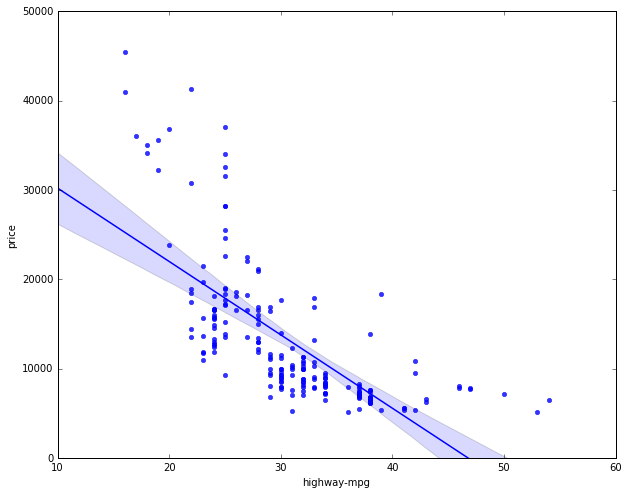

In [11]:
# Visualize Horsepower as potential predictor variable of price
#Regression Plot

width = 10
height = 8
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)


(0, 50000.0)

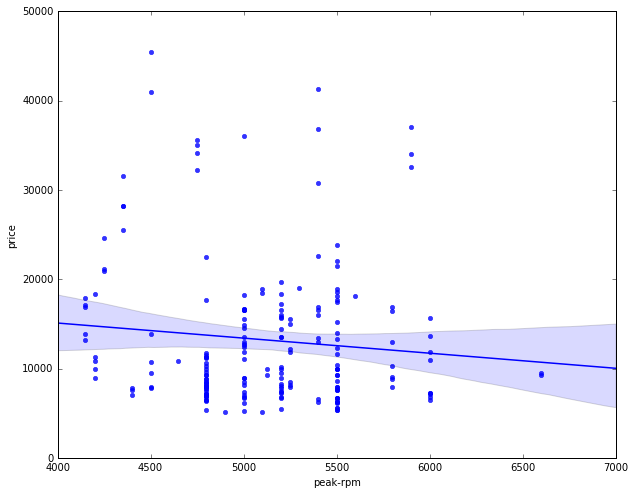

In [12]:
# Compare the previous to peak-rpm
plt.figure(figsize=(width,height))
sns.regplot(x='peak-rpm', y='price', data=df)
plt.ylim(0,)


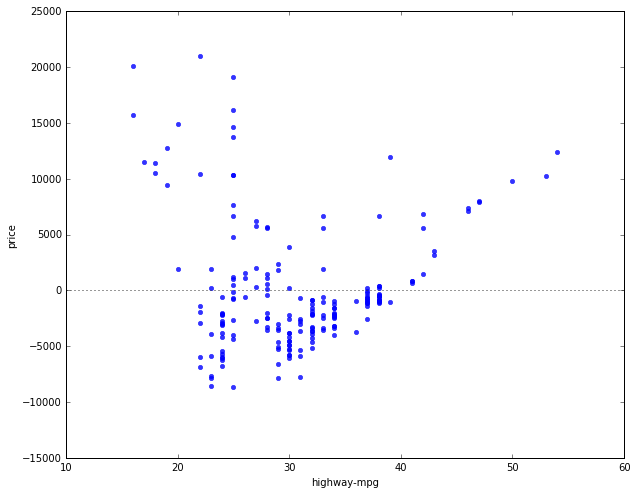

In [13]:
#Residual Plot
#The difference between the observed value (y) and the predicted value (Yhat) is called the residual (e). When we look at a regression plot, 
#the residual is the distance from the data point to the fitted regression line.
width=10
height=8
plt.figure(figsize=(width,height))
sns.residplot(df['highway-mpg'], df['price'])

plt.show()

In [14]:
#Distribution Plot to visualize MLR
#One way to look at the fit of the model is by looking at the distribution plot: We can look at the distribution 
#of the fitted values that result from the model and compare it to the distribution of the actual values.

Y_hat = lm.predict(z)

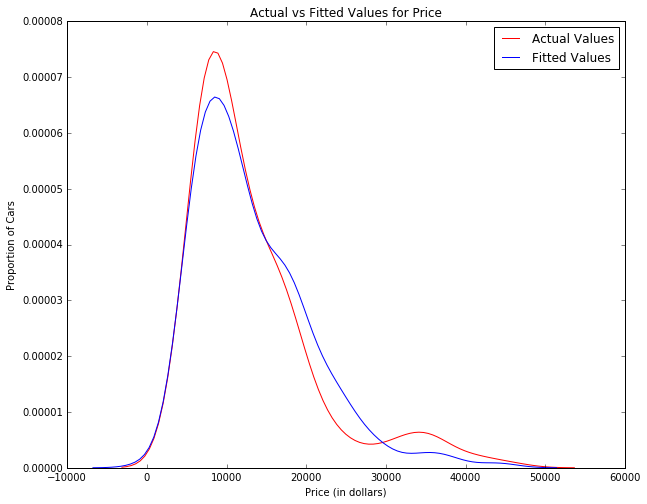

In [15]:
# Draw the figure
plt.figure(figsize=(width, height))

ax1=sns.distplot(df['price'], hist=False, color='r',label='Actual Values')
sns.distplot(Y_hat,hist=False,color='b',label='Fitted Values', ax=ax1)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

In [16]:
#Polynomial regression is a particular case of the general linear regression model or multiple linear regression models. 
#We get non-linear relationships by squaring or setting higher-order terms of the predictor variables.
# will use polynomial model as linear model didn't fit the data
#We will use the following function to plot the data:

def PlotPolly(model,independent_variable,dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable,dependent_variabble,'.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_axis_bgcolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()
    
print("done")



done


In [17]:
#get variables

x = df['highway-mpg']
y = df['price']
print("done")

done


In [18]:
# Here we use a polynomial of the 3rd order (cubic) 
f=np.polyfit(x,y,3)
p=np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


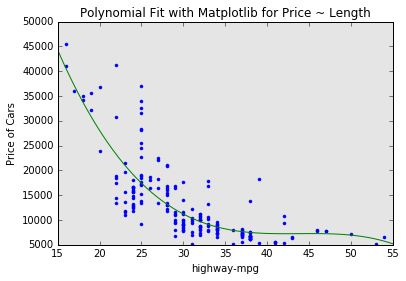

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

In [19]:
#plot the function

PlotPolly(p,x,y, 'highway-mpg')

np.polyfit(x, y, 3)

In [20]:
#Multivariant Polynomial Function
from sklearn.preprocessing import PolynomialFeatures  #improt Module

In [21]:
pr=PolynomialFeatures(degree=2) #Create PolynomialFeature object of degree 2 
pr

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)

In [22]:
Z_pr=pr.fit_transform(z)

In [23]:
print(z.shape)
print(Z_pr.shape)
#Original data is of 201 samples and 4 features, after the transformation, there 201 samples and 15 features

(201, 4)
(201, 15)


Pipeline

Data Pipelines simplify the steps of processing the data. We use the module Pipeline to create a pipeline. We also use StandardScaler as a step in our pipeline

In [24]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [25]:
Input=[('scale',StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model',LinearRegression())]
pipe=Pipeline(Input) # input the list as an argument to the pipeline constructor 
pipe

Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('polynomial', PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)), ('model', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

In [26]:
pipe.fit(z,y) #normalize the data, perform a transform and fit the model simultaneously. 

Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('polynomial', PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)), ('model', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

In [27]:
ypipe=pipe.predict(z) #Similarly, we can normalize the data, perform a transform and produce a prediction simultaneously
ypipe[0:4]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555])

Measures for In-Sample Evaluation:

Two very important measures that are often used in Statistics to determine the accuracy of a model are:

    R^2 / R-squared
    Mean Squared Error (MSE)

R-squared

R squared, also known as the coefficient of determination, is a measure to indicate how close the data is to the fitted regression line. The value of the R-squared is the percentage of variation of the response variable (y) that is explained by a linear model.

Mean Squared Error (MSE)

The Mean Squared Error measures the average of the squares of errors, that is, the difference between actual value (y) and the estimated value (ŷ).

In [29]:
#1# For simple Linear Regression

lm.fit(X, Y) #highway_mpg_fit
lm.score(X, Y) # Find the R^2

0.4965911884339176

In [30]:
#Now calculate MSE
Yhat=lm.predict(X) #Get predictions
Yhat[0:4]

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ])

In [31]:
from sklearn.metrics import mean_squared_error #import the function mean_squared_error from metrics

In [32]:
#mean_squared_error(Y_true, Y_predict)
mean_squared_error(df['price'], Yhat) # compare the predicted results to the actual results

31635042.944639888

In [34]:
#2# For Multiple linear Regression

# fit the model 
lm.fit(z, df['price'])
# Find the R^2
lm.score(z, df['price'])

0.8093562806577457

In [35]:
# To calculate MSE, let's produce predict
Y_predict_multifit = lm.predict(z)
mean_squared_error(df['price'], Y_predict_multifit)

11980366.87072649

In [37]:
#3# For Polynomial Fit
# For R2 will import function r2_score from module metrics as we are using different function
from sklearn.metrics import r2_score

In [38]:
r_squared = r2_score(y, p(x))
r_squared

0.674194666390652

In [39]:
# For MSE
mean_squared_error(df['price'], p(x))

20474146.426361218

# Prediction and Decision making

Prediction

In [41]:
#Now we will use the method predict to produce a prediction.Lets import pyplot for plotting; 
#we will also be using some functions from numpy. 
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [46]:
new_input=np.arange(1,100,1).reshape(-1,1) #create new input
lm.fit(X,Y) #fit the model
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [47]:
#produce prediction
yhat=lm.predict(new_input)
yhat[0:5]

array([37601.57247984, 36779.83910151, 35958.10572319, 35136.37234487,
       34314.63896655])

<function matplotlib.pyplot.show>

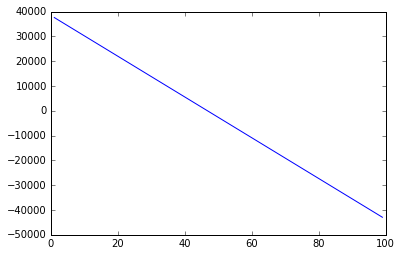

In [48]:
plt.plot(new_input, yhat)
plt.show

Conclusion:

Comparing these three models, we conclude that the MLR model is the best model to be able to predict price from our dataset. This result makes sense, since we have 27 variables in total, and we know that more than one of those variables are potential predictors of the final car price.
